# MadMiner debugging

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext line_profiler

from madminer.goldmine import GoldMine
from madminer.tools.plots import plot_2d_morphing_basis
from delphesprocessor.delphesprocessor import DelphesProcessor
from madminer.refinery import combine_and_shuffle
from madminer.refinery import Refinery
from madminer.refinery import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.refinery import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas
from forge.forge import Forge
from forge.ml.models import ParameterizedRatioEstimator, DoublyParameterizedRatioEstimator


## Debug refinery

In [2]:
refinery = Refinery('data/madminer_example_shuffled.h5', debug=True)

10:01  
10:01  ------------------------------------------------------------
10:01  |                                                          |
10:01  |  MadMiner                                                |
10:01  |                                                          |
10:01  |  Version from July 31, 2018                              |
10:01  |                                                          |
10:01  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:01  |                                                          |
10:01  ------------------------------------------------------------
10:01  
10:01  Loading data from data/madminer_example_shuffled.h5
10:01  Found 2 parameters:
10:01     CWL2 (LHA: dim6 2, maximal power in squared ME: 2, range: (-50.0, 50.0))
10:01     CPWL2 (LHA: dim6 5, maximal power in squared ME: 2, range: (-50.0, 50.0))
10:01  Found 6 benchmarks:
10:01     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
10:01     w: CWL2 = 20.00, CPWL2 = 0.00e+00


In [5]:
_ = refinery.extract_samples_train_local(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=10000,
    folder='./data/samples',
    filename='train0'
)

10:02  Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
10:02  Starting sample extraction
10:02  Augmented data requested:
10:02    ('score', 0)
10:02  Benchmark cross sections [pb]: [0.00042997 0.00035584 0.00069696 0.0006738  0.00115805 0.00118698]
10:02  Drawing 10000 events for the following thetas:
10:02    theta 0 = [0. 0.] (sampling)
10:02    Cumulative probability (should be close to 1): 0.9999610930609123


In [3]:
_ = refinery.extract_samples_train_ratio(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    theta1=constant_morphing_theta([0.,0.]),
    n_samples=10000,
    folder='./data/samples',
    filename='train1'
)

11:19  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)])), denominator hypothesis: ('theta', array([0., 0.]))
11:19  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
11:19  Starting sample extraction
11:19  Augmented data requested:
11:19    ('ratio', 0, 1)
11:19    ('score', 0)
11:19  Benchmark cross sections [pb]: [0.00042997 0.00035584 0.00069696 0.0006738  0.00115805 0.00118698]
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-37.66971476  77.7848811 ] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000300133944664
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-13.79234455  51.50621328] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.000025756613023
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-40.35362674

11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ -4.66293187 -75.01959654] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000084476140694
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [27.56704418  6.38929264] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000059861472121
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-44.34684647 -56.73478318] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 0.9999452619828574
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-52.89764565 -14.14486353] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 0.9999206624021136
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [25.76394916  9.33869554] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative prob

11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 37.29011943 -16.61772453] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000246672089836
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-17.11517544 -13.65896866] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 0.9999324664566327
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 41.66091612 -39.9891647 ] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000416271276436
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [13.95980744 60.6791149 ] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative probability (should be close to 1): 1.0000361263607171
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 59.5613442  -36.21452298] (sampling)
11:19    theta 1 = [0. 0.]
11:19    Cumulative pr

11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [44.66080178  8.48223082]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-36.64551662 -55.10935633]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 78.62881904 -43.53899702]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 9.39201585 50.18306075]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [20.98940098 -3

11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [21.75648465 70.83976065]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-39.26594397   1.16372987]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 31.68958059 121.02558836]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-4.43612738  4.45687893]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [3.49141695 3.8

11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-92.92423103 -24.66651903]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 3.04683264 31.93230351]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [ 31.83554919 -25.94979165]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-39.52458018  78.85571782]
11:19    theta 1 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999610930609123
11:19  Drawing 50 events for the following thetas:
11:19    theta 0 = [-61.95820289

In [9]:
_ = refinery.extract_samples_train_more_ratios(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    theta1=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    #additional_thetas=[random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]) for _ in range(4)],
    n_samples=10000,
    folder='./data/samples',
    filename='train2'
)

17:12  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)])), denominator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)]))
17:12  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
17:12  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
17:12  Starting sample extraction
17:12  Augmented data requested:
17:12    ('ratio', 0, 1)
17:12    ('score', 0)
17:12    ('score', 1)
17:12  Benchmark cross sections [pb]: [0.00042997 0.00035584 0.00069696 0.0006738  0.00115805 0.00118698]
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [19.07881047  5.62694084] (sampling)
17:12    theta 1 = [37.60101221  7.78449222]
17:12    Cumulative probability (should be close to 1): 1.000000299067119
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-39.85707209  27.04022947] (sampling)
17:12    theta 1 = [-0.10220541

17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [68.98325992 88.80896902] (sampling)
17:12    theta 1 = [ 60.02951664 114.80014636]
17:12    Cumulative probability (should be close to 1): 1.0000002149698097
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-25.24818923 -24.56679869] (sampling)
17:12    theta 1 = [-1.31723469  9.19887903]
17:12    Cumulative probability (should be close to 1): 0.9999311609974194
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 51.24444596 -75.1958757 ] (sampling)
17:12    theta 1 = [-48.24778812  41.6212242 ]
17:12    Cumulative probability (should be close to 1): 1.0000502774499556
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [62.63739438 10.89494136] (sampling)
17:12    theta 1 = [-16.79791075  -4.11294241]
17:12    Cumulative probability (should be close to 1): 0.9999828739163233
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-34.9185888

17:12    Cumulative probability (should be close to 1): 0.9999320905437422
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-27.396962   -41.14560474] (sampling)
17:12    theta 1 = [ 14.04239582 -32.35266652]
17:12    Cumulative probability (should be close to 1): 0.9999455870375792
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [72.12706022 21.1544838 ] (sampling)
17:12    theta 1 = [ 71.45503075 -29.30644311]
17:12    Cumulative probability (should be close to 1): 0.9999734763374925
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ -3.41878185 148.75656497] (sampling)
17:12    theta 1 = [ -7.05161768 -43.18752463]
17:12    Cumulative probability (should be close to 1): 1.0000475310543688
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 2.86041945 97.01021034] (sampling)
17:12    theta 1 = [-41.67848418  -9.69482487]
17:12    Cumulative probability (should be close to 1): 1.000044476298344
17:12 

17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 45.59421491 -54.58663444]
17:12    theta 1 = [-4.96550846 64.56642709] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000378577420408
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 81.6169695  -40.45021084]
17:12    theta 1 = [-65.95899095  75.52396253] (sampling)
17:12    Cumulative probability (should be close to 1): 1.000012619303226
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-55.05113723 -10.85436353]
17:12    theta 1 = [-45.56887426  28.39152194] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999701826886271
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [117.11070703  93.7766129 ]
17:12    theta 1 = [-32.67464335  -3.89894566] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999277062552726
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 23.1235

17:12    theta 1 = [-15.24539781  43.80151354] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000168785995278
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-93.10811881  64.17473976]
17:12    theta 1 = [ 44.37998894 -12.83635179] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000183027509206
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [17.64141597 48.77329428]
17:12    theta 1 = [ 67.16383108 -48.54251501] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000362762538426
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-28.83147843 -60.76374824]
17:12    theta 1 = [-18.85922627 -90.51452603] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999994282510816
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-0.3748677  81.51131983]
17:12    theta 1 = [43.92833919 25.14573296] (sampling)
17:12    Cumulative prob

17:12    theta 0 = [ 8.02361906 90.35020226]
17:12    theta 1 = [63.56992459 32.45650475] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999802579289016
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-84.69843532 -43.40841466]
17:12    theta 1 = [-24.71530633 -36.01449002] (sampling)
17:12    Cumulative probability (should be close to 1): 0.9999429038582175
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 17.09043666 -94.20464606]
17:12    theta 1 = [-19.30257497  69.65606782] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000349057579747
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [ 10.12369283 -41.43109276]
17:12    theta 1 = [33.50833375 54.21146843] (sampling)
17:12    Cumulative probability (should be close to 1): 1.0000210337180337
17:12  Drawing 50 events for the following thetas:
17:12    theta 0 = [-34.931632   -50.87314666]
17:12    theta 1 = [-19.41485501  6

In [5]:
x, theta = refinery.extract_samples_test(
    theta=constant_benchmark_theta('sm'),
    n_samples=10000,
    folder='./data/samples',
    filename='test'
)

11:19  Extracting evaluation sample. Sampling according to ('benchmark', 'sm')
11:19  Starting sample extraction
11:19  Augmented data requested:
11:19  Benchmark cross sections [pb]: [0.00018426 0.000164   0.00037822 0.00029139 0.00050157 0.00058414]
11:19  Drawing 10000 events for the following thetas:
11:19    theta 0 = [0. 0.] (sampling)
11:19    Cumulative probability (should be close to 1): 0.9999635413904359


## Debug Forge: ratio estimators

In [2]:
forge = Forge(debug=True)

10:09  
10:09  ------------------------------------------------------------
10:09  |                                                          |
10:09  |  Forge                                                   |
10:09  |                                                          |
10:09  |  Version from July 31, 2018                              |
10:09  |                                                          |
10:09  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:09  |                                                          |
10:09  ------------------------------------------------------------
10:09  


In [10]:
forge.train(
    method='carl',
    theta0_filename='data/samples/theta0_train1.npy',
    x_filename='data/samples/x_train1.npy',
    y_filename='data/samples/y_train1.npy',
    n_epochs=1,
    batch_size=256,
    validation_split=None
)

forge.save('models/carl')

15:31  Starting training
15:31    Method:                 carl
15:31    Training data: theta0 at data/samples/theta0_train1.npy
15:31                   x at data/samples/x_train1.npy
15:31                   y at data/samples/y_train1.npy
15:31    Method:                 carl
15:31    Hidden layers:          (100, 100, 100)
15:31    Activation function:    tanh
15:31    alpha:                  1.0
15:31    Batch size:             64
15:31    Epochs:                 1
15:31    Learning rate:          0.001 initially, decaying to 0.0001
15:31    Early stopping:         True
15:31  Loading training data
15:31  Found 10000 samples with 2 parameters and 2 observables
15:31  Creating model for method carl
15:31  Training model
15:31    Epoch 1: train loss 0.64 ([0.6383811])
15:31  Finished training
15:31  Saving settings to models/carl_settings.json
15:31  Saving state dictionary to models/carl_state_dict.pt


In [10]:
forge.train(
    method='alice',
    theta0_filename='data/samples/theta0_train1.npy',
    x_filename='data/samples/x_train1.npy',
    y_filename='data/samples/y_train1.npy',
    r_xz_filename='data/samples/r_xz_train1.npy',
    alpha=100.,
    n_epochs=5,
    batch_size=256, \
    validation_split=None
)

forge.save('models/alice')

11:22  Starting training
11:22    Method:                 alice
11:22    Training data: theta0 at data/samples/theta0_train1.npy
11:22                   x at data/samples/x_train1.npy
11:22                   y at data/samples/y_train1.npy
11:22                   r_xz at data/samples/r_xz_train1.npy
11:22    Method:                 alice
11:22    Hidden layers:          (100, 100, 100)
11:22    Activation function:    tanh
11:22    alpha:                  100.0
11:22    Batch size:             64
11:22    Epochs:                 5
11:22    Learning rate:          0.001 initially, decaying to 0.0001
11:22    Early stopping:         True
11:22  Loading training data
11:22  Found 10000 samples with 2 parameters and 2 observables
11:22  Creating model for method alice
11:22  Training model
11:23    Epoch 1: train loss 0.62 ([0.61824367])
11:23    Epoch 2: train loss 0.59 ([0.58861098])
11:24    Epoch 3: train loss 0.57 ([0.57278967])
11:24    Epoch 4: train loss 0.56 ([0.56357344])
11:24   

In [18]:
#%lprun -f train_model forge.train( \
%lprun -f ParameterizedRatioEstimator.forward forge.train( \
    method='rascal', \
    theta0_filename='data/samples/theta0_train1.npy', \
    x_filename='data/samples/x_train1.npy', \
    y_filename='data/samples/y_train1.npy', \
    r_xz_filename='data/samples/r_xz_train1.npy', \
    t_xz0_filename='data/samples/t_xz_train1.npy', \
    alpha=100., \
    n_epochs=1, \
    batch_size=256, \
    validation_split=None \
)

forge.save('models/rascal')

16:24  Starting training
16:24    Method:                 rascal
16:24    Training data: theta0 at data/samples/theta0_train1.npy
16:24                   x at data/samples/x_train1.npy
16:24                   y at data/samples/y_train1.npy
16:24                   r_xz at data/samples/r_xz_train1.npy
16:24                   t_xz (theta0) at  data/samples/t_xz_train1.npy
16:24    Method:                 rascal
16:24    Hidden layers:          (100, 100, 100)
16:24    Activation function:    tanh
16:24    alpha:                  100.0
16:24    Batch size:             256
16:24    Epochs:                 1
16:24    Learning rate:          0.001 initially, decaying to 0.0001
16:24    Early stopping:         True
16:24  Loading training data
16:24  Found 10000 samples with 2 parameters and 2 observables
16:24  Creating model for method rascal
16:24  Training model
16:24    Epoch 1: train loss 484.90 ([4.84864781e+02 3.42664705e-04])
16:24  Finished training
16:24  Saving settings to models/r

In [3]:
#%lprun -f train_model forge.train( \
%lprun -f DoublyParameterizedRatioEstimator.forward forge.train( \
    method='rascal2', \
    theta0_filename='data/samples/theta0_train2.npy', \
    theta1_filename='data/samples/theta1_train2.npy', \
    x_filename='data/samples/x_train2.npy', \
    y_filename='data/samples/y_train2.npy', \
    r_xz_filename='data/samples/r_xz_train2.npy', \
    t_xz0_filename='data/samples/t_xz0_train2.npy', \
    t_xz1_filename='data/samples/t_xz1_train2.npy', \
    alpha=100., \
    batch_size=256, \
    n_epochs=1, \
    validation_split=None \
)

forge.save('models/rascal2')

17:24  Starting training
17:24    Method:                 rascal2
17:24    Training data: theta0 at data/samples/theta0_train2.npy
17:24                   theta1 at data/samples/theta1_train2.npy
17:24                   x at data/samples/x_train2.npy
17:24                   y at data/samples/y_train2.npy
17:24                   r_xz at data/samples/r_xz_train2.npy
17:24                   t_xz (theta0) at  data/samples/t_xz0_train2.npy
17:24                   t_xz (theta1) at  data/samples/t_xz1_train2.npy
17:24    Method:                 rascal2
17:24    Hidden layers:          (100, 100, 100)
17:24    Activation function:    tanh
17:24    alpha:                  100.0
17:24    Batch size:             256
17:24    Epochs:                 1
17:24    Learning rate:          0.001 initially, decaying to 0.0001
17:24    Early stopping:         True
17:24  Loading training data
17:24  Found 10000 samples with 2 parameters and 2 observables
17:24  Creating model for method rascal2
17:24  Tra

In [3]:
theta_each = np.linspace(-100.,100.,21)
theta0, theta1 = np.meshgrid(theta_each, theta_each)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T
np.save('data/samples/theta_grid.npy', theta_grid)

theta_denom = np.array([[0.,0.]])
np.save('data/samples/theta_ref.npy', theta_denom)


In [4]:
models = ['carl', 'alice', 'rascal', 'rascal2']
lr_train = []
expected_llr_test = []

for model in models:
    forge.load('models/' + model)

    this_log_r_hat_train, _, _ = forge.evaluate(
        theta0_filename='data/samples/theta0_train1.npy',
        theta1_filename='data/samples/theta1_train1.npy',
        x_filename='data/samples/x_train1.npy',
        test_all_combinations=False,
        evaluate_score=False
    )

    this_log_r_hat_test, _, _ = forge.evaluate(
        theta0_filename='data/samples/theta_grid.npy',
        theta1_filename='data/samples/theta_ref.npy',
        x_filename='data/samples/x_test.npy',
        evaluate_score=False
    )
    
    lr_train.append(this_log_r_hat_train.flatten())
    expected_llr_test.append(np.mean(this_log_r_hat_test, axis=1))


18:47  Loading settings from models/carl_settings.json
18:47    Found method carl, 2 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function
18:47  Loading state dictionary from models/carl_state_dict.pt
18:47  Loading evaluation data
18:47  Starting ratio evaluation
18:47  Evaluation done
18:47  Loading evaluation data
18:47  Starting ratio evaluation for all combinations
18:47  Starting ratio evaluation for thetas 1 / 441: [-100. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 2 / 441: [ -90. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 3 / 441: [ -80. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 4 / 441: [ -70. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 5 / 441: [ -60. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 6 / 441: [ -50. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 7 / 441: [ -40. -100.] vs [0. 0.]
18:47  Starting ratio evaluation for thetas 8 / 441

18:48  Starting ratio evaluation for thetas 102 / 441: [ 70. -60.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 103 / 441: [ 80. -60.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 104 / 441: [ 90. -60.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 105 / 441: [100. -60.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 106 / 441: [-100.  -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 107 / 441: [-90. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 108 / 441: [-80. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 109 / 441: [-70. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 110 / 441: [-60. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 111 / 441: [-50. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 112 / 441: [-40. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 113 / 441: [-30. -50.] vs [0. 0.]
18:48  Starting ratio evaluation for thetas 114 / 441: [-20. -

18:49  Starting ratio evaluation for thetas 207 / 441: [ 70. -10.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 208 / 441: [ 80. -10.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 209 / 441: [ 90. -10.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 210 / 441: [100. -10.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 211 / 441: [-100.    0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 212 / 441: [-90.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 213 / 441: [-80.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 214 / 441: [-70.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 215 / 441: [-60.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 216 / 441: [-50.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 217 / 441: [-40.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 218 / 441: [-30.   0.] vs [0. 0.]
18:49  Starting ratio evaluation for thetas 219 / 441: [-20.  

18:50  Starting ratio evaluation for thetas 314 / 441: [90. 40.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 315 / 441: [100.  40.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 316 / 441: [-100.   50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 317 / 441: [-90.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 318 / 441: [-80.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 319 / 441: [-70.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 320 / 441: [-60.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 321 / 441: [-50.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 322 / 441: [-40.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 323 / 441: [-30.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 324 / 441: [-20.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 325 / 441: [-10.  50.] vs [0. 0.]
18:50  Starting ratio evaluation for thetas 326 / 441: [ 0. 50.]

18:51  Starting ratio evaluation for thetas 421 / 441: [-100.  100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 422 / 441: [-90. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 423 / 441: [-80. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 424 / 441: [-70. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 425 / 441: [-60. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 426 / 441: [-50. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 427 / 441: [-40. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 428 / 441: [-30. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 429 / 441: [-20. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 430 / 441: [-10. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 431 / 441: [  0. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 432 / 441: [ 10. 100.] vs [0. 0.]
18:51  Starting ratio evaluation for thetas 433 / 441: [ 20. 1

18:52  Starting ratio evaluation for thetas 81 / 441: [ 70. -70.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 82 / 441: [ 80. -70.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 83 / 441: [ 90. -70.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 84 / 441: [100. -70.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 85 / 441: [-100.  -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 86 / 441: [-90. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 87 / 441: [-80. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 88 / 441: [-70. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 89 / 441: [-60. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 90 / 441: [-50. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 91 / 441: [-40. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 92 / 441: [-30. -60.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 93 / 441: [-20. -60.] vs [0. 0

18:52  Starting ratio evaluation for thetas 187 / 441: [ 80. -20.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 188 / 441: [ 90. -20.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 189 / 441: [100. -20.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 190 / 441: [-100.  -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 191 / 441: [-90. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 192 / 441: [-80. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 193 / 441: [-70. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 194 / 441: [-60. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 195 / 441: [-50. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 196 / 441: [-40. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 197 / 441: [-30. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 198 / 441: [-20. -10.] vs [0. 0.]
18:52  Starting ratio evaluation for thetas 199 / 441: [-10. -

18:53  Starting ratio evaluation for thetas 293 / 441: [90. 30.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 294 / 441: [100.  30.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 295 / 441: [-100.   40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 296 / 441: [-90.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 297 / 441: [-80.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 298 / 441: [-70.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 299 / 441: [-60.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 300 / 441: [-50.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 301 / 441: [-40.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 302 / 441: [-30.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 303 / 441: [-20.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 304 / 441: [-10.  40.] vs [0. 0.]
18:53  Starting ratio evaluation for thetas 305 / 441: [ 0. 40.]

18:54  Starting ratio evaluation for thetas 400 / 441: [-100.   90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 401 / 441: [-90.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 402 / 441: [-80.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 403 / 441: [-70.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 404 / 441: [-60.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 405 / 441: [-50.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 406 / 441: [-40.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 407 / 441: [-30.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 408 / 441: [-20.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 409 / 441: [-10.  90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 410 / 441: [ 0. 90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 411 / 441: [10. 90.] vs [0. 0.]
18:54  Starting ratio evaluation for thetas 412 / 441: [20. 90.] v

18:55  Starting ratio evaluation for thetas 59 / 441: [ 60. -80.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 60 / 441: [ 70. -80.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 61 / 441: [ 80. -80.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 62 / 441: [ 90. -80.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 63 / 441: [100. -80.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 64 / 441: [-100.  -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 65 / 441: [-90. -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 66 / 441: [-80. -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 67 / 441: [-70. -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 68 / 441: [-60. -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 69 / 441: [-50. -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 70 / 441: [-40. -70.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 71 / 441: [-30. -70.] vs [0. 0

18:55  Starting ratio evaluation for thetas 165 / 441: [ 70. -30.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 166 / 441: [ 80. -30.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 167 / 441: [ 90. -30.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 168 / 441: [100. -30.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 169 / 441: [-100.  -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 170 / 441: [-90. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 171 / 441: [-80. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 172 / 441: [-70. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 173 / 441: [-60. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 174 / 441: [-50. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 175 / 441: [-40. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 176 / 441: [-30. -20.] vs [0. 0.]
18:55  Starting ratio evaluation for thetas 177 / 441: [-20. -

18:56  Starting ratio evaluation for thetas 271 / 441: [80. 20.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 272 / 441: [90. 20.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 273 / 441: [100.  20.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 274 / 441: [-100.   30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 275 / 441: [-90.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 276 / 441: [-80.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 277 / 441: [-70.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 278 / 441: [-60.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 279 / 441: [-50.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 280 / 441: [-40.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 281 / 441: [-30.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 282 / 441: [-20.  30.] vs [0. 0.]
18:56  Starting ratio evaluation for thetas 283 / 441: [-10.  30.]

18:57  Starting ratio evaluation for thetas 378 / 441: [100.  70.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 379 / 441: [-100.   80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 380 / 441: [-90.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 381 / 441: [-80.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 382 / 441: [-70.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 383 / 441: [-60.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 384 / 441: [-50.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 385 / 441: [-40.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 386 / 441: [-30.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 387 / 441: [-20.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 388 / 441: [-10.  80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 389 / 441: [ 0. 80.] vs [0. 0.]
18:57  Starting ratio evaluation for thetas 390 / 441: [10. 80.]

TypeError: forward() got an unexpected keyword argument 'track_score'

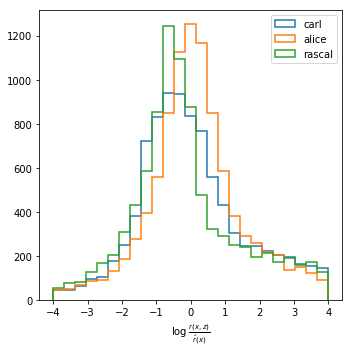

In [6]:
lr_xz = np.log(np.load('data/samples/r_xz_train1.npy')).flatten()

fig = plt.figure(figsize=(5,5))

for i, (lr, label) in enumerate(zip(lr_train, models)):
    plt.hist((lr_xz - lr), histtype='step', range=(-4,4.), bins=25, color='C' + str(i), lw=1.5, label=label)
    
plt.legend()

plt.xlabel(r'$\log \; \frac {r(x,z)}{\hat{r}(x)}$')
plt.tight_layout()
plt.show()

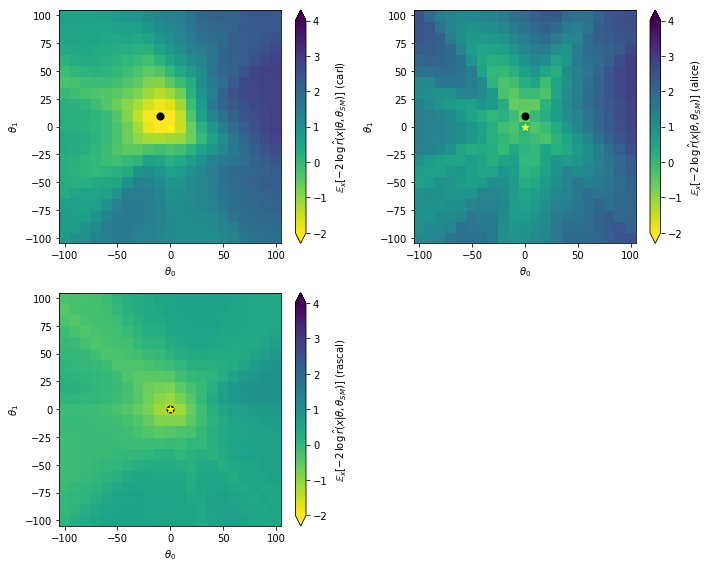

In [7]:
cmin, cmax = -2.,4.

bin_size = theta_each[1] - theta_each[0]
edges = np.linspace(theta_each[0] - bin_size/2, theta_each[-1] + bin_size/2, 21+1)

fig = plt.figure(figsize=(10,8))

for i, (elr, label) in enumerate(zip(expected_llr_test, models)):
    ax = plt.subplot(2,2,i+1)
    
    

    pcm = ax.pcolormesh(edges, edges, -2. * elr.reshape((21,21)),
                        norm=matplotlib.colors.Normalize(vmin=cmin, vmax=cmax),
                        cmap='viridis_r')
    cbar = fig.colorbar(pcm, ax=ax, extend='both')
    
    best_fit = theta_grid[np.argmin(-2.*elr)]
    plt.scatter(best_fit[0], best_fit[1], s=50., color='black', marker='o')
    plt.scatter(0., 0., s=50., color='yellow', marker='*')

    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$\theta_1$')
    cbar.set_label(r'$\mathbb{E}_x [ -2\, \log \,\hat{r}(x | \theta, \theta_{SM}) ]$ (' + label + ')')

plt.tight_layout()
plt.show()


## Debug Forge: score estimators and Fisher information

In [2]:
forge = Forge(debug=True)

10:12  
10:12  ------------------------------------------------------------
10:12  |                                                          |
10:12  |  Forge                                                   |
10:12  |                                                          |
10:12  |  Version from July 31, 2018                              |
10:12  |                                                          |
10:12  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:12  |                                                          |
10:12  ------------------------------------------------------------
10:12  


In [2]:
forge.train(
    method='sally',
    x_filename='data/samples/x_train0.npy',
    t_xz0_filename='data/samples/t_xz_train0.npy',
    n_epochs=10,
    batch_size=256,
    validation_split=None
)

forge.save('models/sally')

10:11  
10:11  ------------------------------------------------------------
10:11  |                                                          |
10:11  |  Forge                                                   |
10:11  |                                                          |
10:11  |  Version from July 31, 2018                              |
10:11  |                                                          |
10:11  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:11  |                                                          |
10:11  ------------------------------------------------------------
10:11  
10:11  Starting training
10:11    Method:                 sally
10:11    Training data: x at data/samples/x_train0.npy
10:11                   t_xz (theta0) at  data/samples/t_xz_train0.npy
10:11    Method:                 sally
10:11    Hidden layers:          (100, 100, 100)
10:11    Activation function:    tanh
10:11    alpha:                  1.0
10:11    Batch size

In [5]:
forge.load('models/sally')

t_hat = forge.evaluate(
    x_filename='data/samples/x_test.npy'
)

10:12  Loading settings from models/sally_settings.json
10:12    Found method sally, 2 observables, 2 parameters, (100, 100, 100) hidden layers, tanh activation function
10:12  Loading state dictionary from models/sally_state_dict.pt
10:12  Loading evaluation data
10:12  Starting score evaluation


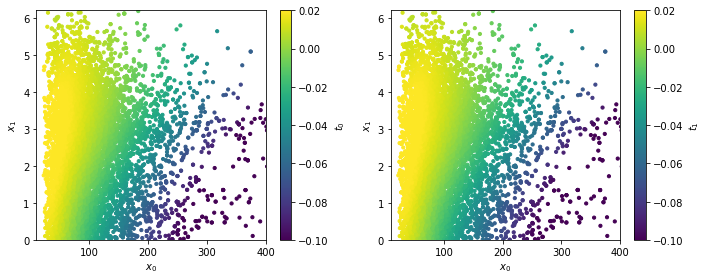

In [15]:
x = np.load('data/samples/x_test.npy')

fig = plt.figure(figsize=(10,4))

for i in range(2):
    
    ax = plt.subplot(1,2,i+1)

    sc = plt.scatter(x[:,0], x[:,1], c=t_hat[:,0], s=10., cmap='viridis', vmin=-0.1, vmax=0.02)
    cbar = plt.colorbar(sc)

    cbar.set_label('$t_' + str(i) + '$')
    plt.xlabel(r'$x_0$')
    plt.ylabel(r'$x_1$')
    plt.xlim(10.,400.)
    plt.ylim(0.,6.2)
    
plt.tight_layout()
plt.show()



In [13]:
np.mean(t_hat,axis=0)

array([-0.00176534, -0.0010277 ], dtype=float32)